In [410]:
import pandas as pd
import re, math
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Data

In [411]:
df_data = pd.read_excel("Budget_file.xlsx", sheet_name = "Sheet1")
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60
...,...,...,...,...,...,...,...
763,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.00,NaN,95992.53
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92
765,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.00,NaN,94397.92
766,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.00,NaN,94239.92


In [412]:
df_data["source"]=df_data["Narration"].apply(lambda x: "UPI" if re.search("UPI",x) else ("POS" if re.search("POS",x) else "Others"))
df_data["Transaction_type"]=df_data["Withdrawl"].apply(lambda x: "Deposit" if math.isnan(x) else "Withdrawl")

In [413]:
df_data["Transaction_type"].value_counts()

Withdrawl    687
Deposit       81
Name: Transaction_type, dtype: int64

In [414]:
df_data["source"].value_counts()

UPI       663
Others     97
POS         8
Name: source, dtype: int64

Cleaning Data Method

In [415]:
def clean_narration(text,upi):
    clean_text = re.sub(r"@.*", "", text)
    clean_text = re.sub(r"[^A-Za-z\s]", " ", clean_text)
    clean_text = re.sub(r'\b\w{16,}\b', '', clean_text)
    clean_text = re.sub("UPI","", clean_text)
    clean_text = re.sub(' +', ' ', clean_text)
    clean_text = re.sub(r'\b(\w*([a-zA-Z])\2{2,}\w*)\b', '', clean_text)
    clean_text = clean_text.lower()
    words = re.split('\s+',clean_text)
    l=len(words)
    first_four = " ".join(words[:4])
    last_four = " ".join(words[-4:])
    if (upi == "UPI"):
        return first_four
    else:
        return clean_text

In [416]:
df_data["Amount"]=0
df_data["clean_narration"]=""

In [417]:
for i in range(0,df_data.shape[0]):
    df_data["clean_narration"].iloc[i] = clean_narration(df_data["Narration"].iloc[i],df_data["source"].iloc[i])
    if(df_data["Transaction_type"].iloc[i]=="Withdrawl"):
        df_data["Amount"].iloc[i]=df_data["Withdrawl"].iloc[i]
    else:
        df_data["Amount"].iloc[i]=df_data["Deposit"].iloc[i]
    df_data["clean_narration"].iloc[i] = clean_narration(df_data["Narration"].iloc[i],df_data["source"].iloc[i])

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\644584423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["clean_narration"].iloc[i] = clean_narration(df_data["Narration"].iloc[i],df_data["source"].iloc[i])
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\644584423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Amount"].iloc[i]=df_data["Withdrawl"].iloc[i]
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\644584423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [418]:
# df_data["clean_narration"]=df_data["Narration"].apply(clean_narration)
# df_data

In [419]:
df_data=df_data[df_data["Amount"]>2]

In [420]:
df_data[df_data["source"]=="Others"]

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,
7,10/01/22,20220110255785001760/PAYTMLICINDIA,0000220101268655,10/01/22,29568.66,NaN,75901.94,Others,Withdrawl,29568.66,paytmlicindia
8,10/01/22,IB SS FUNDS TRANSFER DR-55000002937593,000000000000000,10/01/22,50000.00,NaN,25901.94,Others,Withdrawl,50000.00,ib ss funds transfer dr
9,11/01/22,RD THROUGH MOBILE-50400264425075 :SUMIT MOHAN...,000000000000000,11/01/22,1400.00,NaN,24501.94,Others,Withdrawl,1400.00,rd through mobile sumit mohan gupta
10,13/01/22,HDFC MUTUAL FUND RE-HDFC CORP BOND FUND,0000855360104965,13/01/22,NaN,6.71,24508.65,Others,Deposit,6.71,hdfc mutual fund re hdfc corp bond fund
...,...,...,...,...,...,...,...,...,...,...,...
704,16/12/22,RD CLOSURE THROUGH NET BANKING - 50400269095673,000000000000000,16/12/22,NaN,111703.00,114964.47,Others,Deposit,111703.00,rd closure through net banking
710,17/12/22,IB SS FUNDS TRANSFER DR-55000002937593,000000000000000,17/12/22,80000.00,NaN,34367.37,Others,Withdrawl,80000.00,ib ss funds transfer dr
751,29/12/22,NEFT CR-BOFA0MM6205-ACCENTURE SOLUTIONS PVT LT...,1229202200261100,29/12/22,NaN,131947.00,169832.37,Others,Deposit,131947.00,neft cr bofa mm accenture solutions pvt ltd su...
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92,Others,Deposit,1403.39,


In [421]:
df_data.to_csv("file.csv")

In [422]:
df_data["clean_narration"].fillna('Blank',inplace=True)

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\1909840480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["clean_narration"].fillna('Blank',inplace=True)


In [423]:
vect =TfidfVectorizer(sublinear_tf=True, min_df=3, ngram_range=(1, 3))
documents = df_data["clean_narration"]
vect_text=vect.fit_transform(documents)

In [424]:
from sklearn.metrics.pairwise import cosine_similarity

In [425]:
similarities = cosine_similarity(vect_text)

In [426]:
threshold = 0.6

In [427]:
# find pairs of documents that have a cosine similarity greater than the threshold
for i in range(len(documents)):
    for j in range(i+1, len(documents)):
        if similarities[i][j] > threshold:
            print("Document", i+1, "and Document", j+1, "are similar with similarity of", similarities[i][j])

Document 1 and Document 6 are similar with similarity of 1.0
Document 1 and Document 7 are similar with similarity of 1.0
Document 1 and Document 24 are similar with similarity of 1.0
Document 1 and Document 76 are similar with similarity of 1.0
Document 1 and Document 145 are similar with similarity of 1.0
Document 1 and Document 165 are similar with similarity of 1.0
Document 1 and Document 169 are similar with similarity of 1.0
Document 1 and Document 177 are similar with similarity of 1.0
Document 1 and Document 454 are similar with similarity of 1.0
Document 2 and Document 5 are similar with similarity of 1.0000000000000002
Document 2 and Document 461 are similar with similarity of 1.0000000000000002
Document 2 and Document 473 are similar with similarity of 1.0000000000000002
Document 2 and Document 492 are similar with similarity of 1.0000000000000002
Document 3 and Document 41 are similar with similarity of 1.0
Document 3 and Document 489 are similar with similarity of 0.789036

In [428]:
from sklearn.cluster import KMeans

In [429]:
k_clusters=40

c:\Users\sumit.bu.gupta\Documents\Analytics\my_jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


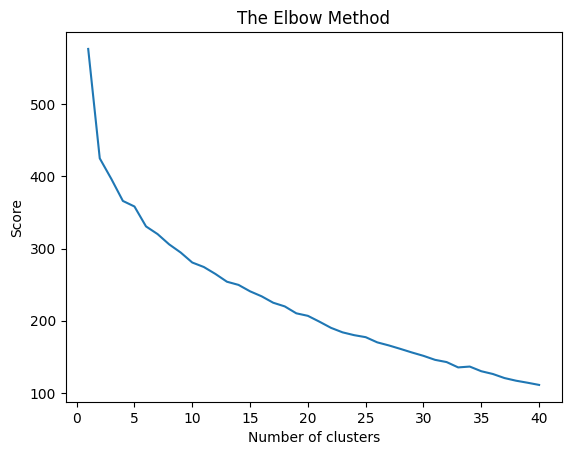

In [430]:
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i)#,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(vect_text)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

Using kmeans to cluster and fit the similarities

In [431]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(similarities)
clusters = kmeans.labels_

c:\Users\sumit.bu.gupta\Documents\Analytics\my_jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [432]:
# Create a new column to display the predicted result
df_data["ClusterName"] = clusters
df_data.head(20)

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\3750464302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["ClusterName"] = clusters


,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76,UPI,Withdrawl,25000.00,rajendra kumar vishn,15
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76,UPI,Withdrawl,785.00,life line pharmacy,1
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21,UPI,Withdrawl,510.55,vodafone idea ltd,1
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,,1
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60,UPI,Withdrawl,115.00,life line pharmacy,1
5,10/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000201036200121,10/01/22,NaN,50000.00,75470.60,UPI,Deposit,50000.00,rajendra kumar vishn,15
6,10/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000201036209271,10/01/22,NaN,30000.00,105470.60,UPI,Deposit,30000.00,rajendra kumar vishn,15
7,10/01/22,20220110255785001760/PAYTMLICINDIA,0000220101268655,10/01/22,29568.66,NaN,75901.94,Others,Withdrawl,29568.66,paytmlicindia,1
8,10/01/22,IB SS FUNDS TRANSFER DR-55000002937593,000000000000000,10/01/22,50000.00,NaN,25901.94,Others,Withdrawl,50000.00,ib ss funds transfer dr,1
9,11/01/22,RD THROUGH MOBILE-50400264425075 :SUMIT MOHAN...,000000000000000,11/01/22,1400.00,NaN,24501.94,Others,Withdrawl,1400.00,rd through mobile sumit mohan gupta,5


In [433]:
df_data.to_csv("final_cluster_similarity.csv",index=False)

In [434]:
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76,UPI,Withdrawl,25000.00,rajendra kumar vishn,15
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76,UPI,Withdrawl,785.00,life line pharmacy,1
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21,UPI,Withdrawl,510.55,vodafone idea ltd,1
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,,1
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60,UPI,Withdrawl,115.00,life line pharmacy,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.00,NaN,95992.53,UPI,Withdrawl,800.00,hair glow,1
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92,Others,Deposit,1403.39,,1
765,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.00,NaN,94397.92,UPI,Withdrawl,2998.00,mahavir the home,1
766,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.00,NaN,94239.92,UPI,Withdrawl,158.00,aayushi super shoppy,6


In [435]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=2, norm='l2', ngram_range=(1, 3))
documents = df_data["clean_narration"]
vect_text=vectorizer.fit_transform(documents)

Using LDA to do topic modelling 

In [436]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=15,learning_method='online',random_state=42,max_iter=10) 
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)

(750, 15)


In [437]:
vectorizer.get_feature_names_out()

array(['aayushi', 'aayushi super', 'aayushi super shoppy', 'accenture',
       'accenture salary', 'accenture solutions',
       'accenture solutions pvt', 'aeml', 'aeml awsp', 'airtel',
       'airtel limite', 'akash', 'akash bhatt', 'alok', 'and', 'and namk',
       'app', 'app paytm', 'apr', 'ashok', 'atm', 'atm mumbai', 'aug',
       'autopay', 'autopay si', 'autopay si tad', 'awsp', 'barb',
       'barb education', 'barb education loan', 'barb transfer',
       'bbdaily', 'bbdaily bbdaily', 'bharatpe', 'bharti',
       'bharti airtel', 'bharti airtel limite', 'bhatt', 'billdeskpg',
       'bofa', 'bofa mm', 'bofa mm accenture', 'capitalised', 'ccavenues',
       'ccavenues ccavenues', 'center', 'chauhan', 'chemist',
       'chemist and', 'chemist paytmqr', 'chheda', 'chouhan',
       'chouhan chauhan', 'club', 'cms', 'com', 'country',
       'country delight', 'country delight paytm', 'cr', 'cr bofa',
       'cr bofa mm', 'cr kkbk', 'cr kkbk eclerx', 'cred', 'cred club',
       'c

In [438]:
len(vectorizer.get_feature_names_out())

458

In [439]:
len(lda_model.components_[2])

458

In [440]:
len(lda_model.components_)

15

In [441]:
topic_df = pd.DataFrame(columns=['Topic','Topic_desc'])

In [442]:
def print_topics(model, vectorizer, top_n=5): 
    for idx, topic in enumerate(model.components_): 
        print("Topic %d:" % (idx)) 
        #topic_df["Topic"].iloc[idx]=idx
        print([(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])
        #topic_df["Topic_desc"].iloc[idx]=[(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        topic_df.loc[idx]=[idx,[(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]]
print_topics(lda_model, vectorizer)

Topic 0:
[('private', 2.5746913676144003), ('md', 1.8061487117000672), ('akash bhatt', 1.7895296181655829), ('akash', 1.7890223639030784), ('bhatt', 1.7887632946071699)]
Topic 1:
[('paytm', 10.26128995578003), ('gpay', 8.581666238098713), ('rd', 7.414955874312855), ('hungerbox', 6.916208427848991), ('hungerbox paytm', 6.9156591383046875)]
Topic 2:
[('razorpay', 5.244146235104516), ('chemist', 3.6446008629615174), ('tirupati chemist', 3.072339005159313), ('tirupati', 3.072303607738346), ('tirupati chemist paytmqr', 3.072174350931757)]
Topic 3:
[('mohan', 11.08819371797797), ('mohan gupta', 10.250895116760548), ('sumit mohan gupta', 10.2494267893954), ('sumit mohan', 10.249389144748095), ('sumit', 10.073465157453816)]
Topic 4:
[('daily', 85.12195606640891), ('jar', 84.4834058522183), ('save daily', 84.25362179563938), ('jar save daily', 84.25352332760022), ('save', 84.25323932353834)]
Topic 5:
[('paytmqr', 6.471232692122414), ('stores paytmqr', 2.555670343512131), ('stores', 2.3828304366

In [443]:
topic_df

,Topic,Topic_desc
0,0,"[(private, 2.5746913676144003), (md, 1.8061487..."
1,1,"[(paytm, 10.26128995578003), (gpay, 8.58166623..."
2,2,"[(razorpay, 5.244146235104516), (chemist, 3.64..."
3,3,"[(mohan, 11.08819371797797), (mohan gupta, 10...."
4,4,"[(daily, 85.12195606640891), (jar, 84.48340585..."
5,5,"[(paytmqr, 6.471232692122414), (stores paytmqr..."
6,6,"[(aayushi super shoppy, 7.527508157233318), (a..."
7,7,"[(kopal, 4.464382952734908), (chouhan chauhan,..."
8,8,"[(juice, 14.827374595820237), (juice center, 1..."
9,9,"[(naresh, 14.35104069894824), (purohit, 13.549..."


In [444]:
df_data["doc_topic"]=0
df_data["topic_desc"]=""

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\274835848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["doc_topic"]=0
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\274835848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["topic_desc"]=""


In [445]:
for i, doc in enumerate(vect_text):
    topic = lda_model.transform(doc)
    topic, _ = topic.argmax(), topic.max()
    df_data["doc_topic"].iloc[i]=topic
    df_data["topic_desc"].iloc[i]=topic_df['Topic_desc'].loc[topic_df['Topic'] == topic]
    print(f"Document {i} belongs to topic {topic}")

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\2679303583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["doc_topic"].iloc[i]=topic
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_13956\2679303583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["topic_desc"].iloc[i]=topic_df['Topic_desc'].loc[topic_df['Topic'] == topic]


Document 0 belongs to topic 12
Document 1 belongs to topic 13
Document 2 belongs to topic 5
Document 3 belongs to topic 0
Document 4 belongs to topic 13
Document 5 belongs to topic 12
Document 6 belongs to topic 12
Document 7 belongs to topic 0
Document 8 belongs to topic 7
Document 9 belongs to topic 3
Document 10 belongs to topic 11
Document 11 belongs to topic 11
Document 12 belongs to topic 3
Document 13 belongs to topic 11
Document 14 belongs to topic 0
Document 15 belongs to topic 3
Document 16 belongs to topic 1
Document 17 belongs to topic 12
Document 18 belongs to topic 0
Document 19 belongs to topic 0
Document 20 belongs to topic 8
Document 21 belongs to topic 8
Document 22 belongs to topic 3
Document 23 belongs to topic 12
Document 24 belongs to topic 3
Document 25 belongs to topic 0
Document 26 belongs to topic 0
Document 27 belongs to topic 12
Document 28 belongs to topic 0
Document 29 belongs to topic 0
Document 30 belongs to topic 1
Document 31 belongs to topic 1
Documen

In [446]:
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName,doc_topic,topic_desc
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76,UPI,Withdrawl,25000.00,rajendra kumar vishn,15,12,"[[(kumar, 6.725558899056622), (rajendra, 4.255..."
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76,UPI,Withdrawl,785.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p..."
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21,UPI,Withdrawl,510.55,vodafone idea ltd,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq..."
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148..."
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60,UPI,Withdrawl,115.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.00,NaN,95992.53,UPI,Withdrawl,800.00,hair glow,1,14,"[[(nwd, 1.59712711898875), (chheda, 1.54512861..."
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148..."
765,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.00,NaN,94397.92,UPI,Withdrawl,2998.00,mahavir the home,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq..."
766,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.00,NaN,94239.92,UPI,Withdrawl,158.00,aayushi super shoppy,6,6,"[[(aayushi super shoppy, 7.527508157233318), (..."


In [447]:
df_data = df_data[df_data["Narration"]!=0]
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName,doc_topic,topic_desc
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76,UPI,Withdrawl,25000.00,rajendra kumar vishn,15,12,"[[(kumar, 6.725558899056622), (rajendra, 4.255..."
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76,UPI,Withdrawl,785.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p..."
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21,UPI,Withdrawl,510.55,vodafone idea ltd,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq..."
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148..."
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60,UPI,Withdrawl,115.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.00,NaN,95992.53,UPI,Withdrawl,800.00,hair glow,1,14,"[[(nwd, 1.59712711898875), (chheda, 1.54512861..."
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148..."
765,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.00,NaN,94397.92,UPI,Withdrawl,2998.00,mahavir the home,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq..."
766,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.00,NaN,94239.92,UPI,Withdrawl,158.00,aayushi super shoppy,6,6,"[[(aayushi super shoppy, 7.527508157233318), (..."


In [448]:
df_manual_cat = pd.read_csv("master.csv")
df_manual_cat

,Extract_text,Category,Parent_Category
0,JAR,JAR,Investment
1,RD INSTALLMENT,RD INSTALLMENT,Investment
2,DC EMI LOAN,DC EMI LOAN,Card Loan
3,AAYUSHI,AAYUSHI SHOP,Grocery
4,JUICE,JUICE,Food
5,AIRTEL,AIRTEL,Communication
6,JIOFIBER,JIOFIBER,Communication
7,VEGETABLES,VEGETABLES,Grocery
8,COUNTRY DELIGHT,COUNTRY DELIGHT,Grocery
9,HUNGERBOX,HUNGERBOX,Food


In [449]:
def manual_category(text):
    try:
        text = text.lower()
        for i in range(0,df_manual_cat.shape[0]):
            text1 = df_manual_cat["Extract_text"].iloc[i]
            text1=text1.lower()
            if text1 in text:
                return df_manual_cat["Category"].iloc[i]
        return "Others"
    except:
        return None

In [450]:
def manual_parent_category(text):
    try:
        for i in range(0,df_manual_cat.shape[0]):
            text1 = df_manual_cat["Category"].iloc[i]
            if text1 in text:
                return df_manual_cat["Parent_Category"].iloc[i]
        return "Others"
    except:
        return None

In [451]:
df_data["Manual_category"]=df_data["Narration"].apply(manual_category)
df_data["Parent_category"]=df_data["Manual_category"].apply(manual_parent_category)

In [452]:
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName,doc_topic,topic_desc,Manual_category,Parent_category
0,02/01/22,UPI-RAJENDRA KUMAR VISHN-RKVISHNOI-2@OKAXIS-HD...,0000200230286829,02/01/22,25000.00,NaN,25477.76,UPI,Withdrawl,25000.00,rajendra kumar vishn,15,12,"[[(kumar, 6.725558899056622), (rajendra, 4.255...",RAJENDRA TRANSFER,Transfer
1,03/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200355459423,03/01/22,785.00,NaN,24692.76,UPI,Withdrawl,785.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p...",PHARMACY,Medical
2,05/01/22,UPI-VODAFONE IDEA LTD-VILPOSDEL@PAYTM-PYTM0123...,0000200582665574,05/01/22,510.55,NaN,24182.21,UPI,Withdrawl,510.55,vodafone idea ltd,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq...",VODAFONE,Communication
3,06/01/22,05432150000051-007188242,0000201065735781,06/01/22,NaN,1403.39,25585.60,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148...",Others,Others
4,08/01/22,UPI-LIFE LINE PHARMACY-GPAY-11171066437@OKBIZA...,0000200832314105,08/01/22,115.00,NaN,25470.60,UPI,Withdrawl,115.00,life line pharmacy,1,13,"[[(life line pharmacy, 1.9783677450456165), (p...",PHARMACY,Medical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.00,NaN,95992.53,UPI,Withdrawl,800.00,hair glow,1,14,"[[(nwd, 1.59712711898875), (chheda, 1.54512861...",HAIR,Salon
764,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92,Others,Deposit,1403.39,,1,0,"[[(private, 2.5746913676144003), (md, 1.806148...",Others,Others
765,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.00,NaN,94397.92,UPI,Withdrawl,2998.00,mahavir the home,1,5,"[[(paytmqr, 6.471232692122414), (stores paytmq...",Others,Others
766,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.00,NaN,94239.92,UPI,Withdrawl,158.00,aayushi super shoppy,6,6,"[[(aayushi super shoppy, 7.527508157233318), (...",AAYUSHI SHOP,Grocery


In [453]:
formats = ['%d/%m/%y', '%d-%m-%y', '%d.%m.%y', '%d %m %y', '%Y/%m/%d', '%Y-%m-%d', '%Y.%m.%d', '%Y %m %d']

for date_format in formats:
    try:
        pd.to_datetime(df_data['Date2'], format=date_format)
    except ValueError as e:
        pass
    else:
        print(f"The date format of the column is: {date_format}")
        break

In [454]:
df_data['Date2']= pd.to_datetime(df_data['Date'],format='%d/%m/%y')
#df_data['Value_dt']= pd.to_datetime(df_data['Value_dt'],format='%d/%m/%y')

In [455]:
df_data['Date2'] = df_data['Date2'].dt.strftime('%m/%d/%Y')
#df['date'] = df['date'].dt.strftime('%m/%d/%Y')

In [456]:
df_data.to_csv("vectorization_lda_output.csv")

In [289]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 509
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              496 non-null    object        
 1   Narration         496 non-null    object        
 2   Ref_no            496 non-null    object        
 3   Value_dt          496 non-null    datetime64[ns]
 4   Withdrawl         466 non-null    float64       
 5   Deposit           30 non-null     float64       
 6   Closing Balance   496 non-null    float64       
 7   source            496 non-null    object        
 8   Transaction_type  496 non-null    object        
 9   Amount            496 non-null    float64       
 10  clean_narration   496 non-null    object        
 11  ClusterName       496 non-null    int32         
 12  doc_topic         496 non-null    int64         
 13  topic_desc        496 non-null    object        
 14  Manual_category   496 non-

In [343]:
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,source,Transaction_type,Amount,clean_narration,ClusterName,doc_topic,topic_desc,Manual_category,Parent_category,Date2
0,01/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218249800677,2022-07-01,20.0,NaN,34304.26,UPI,Withdrawl,20.00,jar save daily,1,7,"[[(daily, 71.31363994705612), (jar, 70.5243211...",JAR,Investment,07/01/2022
1,02/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218327074783,2022-07-02,21.0,NaN,34283.26,UPI,Withdrawl,21.00,jar save daily,1,7,"[[(daily, 71.31363994705612), (jar, 70.5243211...",JAR,Investment,07/02/2022
2,03/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218430894428,2022-07-03,20.0,NaN,34263.26,UPI,Withdrawl,20.00,jar save daily,1,7,"[[(daily, 71.31363994705612), (jar, 70.5243211...",JAR,Investment,07/03/2022
3,03/07/22,UPI-NARESH PUROHIT-NP1784534@OKHDFCBANK-HDFC00...,0000218435006946,2022-07-03,20.0,NaN,34243.26,UPI,Withdrawl,20.00,naresh purohit np,3,6,"[[(purohit, 8.247507413085748), (purohit np, 8...",DAIRY,Grocery,07/03/2022
4,04/07/22,UPI-KRISHNA VEGETABLES A-PAYTMQR281005050101OG...,0000218563429825,2022-07-04,25.0,NaN,34218.26,UPI,Withdrawl,25.00,krishna vegetables a,15,1,"[[(krishna vegetables, 2.868090070716998), (kr...",VEGETABLES,Grocery,07/04/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,2022-12-31,800.0,NaN,95992.53,UPI,Withdrawl,800.00,hair glow,0,14,"[[(kumar, 1.915175072264887), (money, 1.724489...",HAIR,Salon,12/31/2022
506,31/12/22,05432150000051-007188242,0000212311762603,2022-12-31,NaN,1403.39,97395.92,Others,Deposit,1403.39,,0,0,"[[(kopal chouhan chauhan, 2.3305858853071073),...",Others,Others,12/31/2022
507,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,2022-12-31,2998.0,NaN,94397.92,UPI,Withdrawl,2998.00,mahavir the home,0,0,"[[(kopal chouhan chauhan, 2.3305858853071073),...",Others,Others,12/31/2022
508,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,2022-12-31,158.0,NaN,94239.92,UPI,Withdrawl,158.00,aayushi super shoppy,7,4,"[[(aayushi super shoppy, 7.068495523819026), (...",AAYUSHI SHOP,Grocery,12/31/2022


#END